In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("datasets/go_trackspoints.csv")

### 1. Exploratory Data Analysis

In [7]:
df.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [8]:
df.shape

(18107, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18107 entries, 0 to 18106
Data columns (total 5 columns):
id           18107 non-null int64
latitude     18107 non-null float64
longitude    18107 non-null float64
track_id     18107 non-null int64
time         18107 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 707.4+ KB


In [10]:
df.describe()

,id,latitude,longitude,track_id
count,18107.000000,18107.000000,18107.000000,18107.000000
mean,9958.405920,-10.998744,-37.111923,13296.340697
std,5748.673657,1.329848,0.938015,18040.767448
min,1.000000,-27.603175,-48.632918,1.000000
25%,4736.500000,-10.944041,-37.073069,33.000000
50%,10376.000000,-10.922000,-37.057784,136.000000
75%,15004.500000,-10.904268,-37.050190,37992.000000
max,19569.000000,-10.292845,-36.493357,38092.000000


* No missing values
* No invalid latitude and longitude values

In [13]:
print("Number of trips : ", df["track_id"].unique().shape)
print("Number of data points : ", df["id"].unique().shape)

Number of trips :  (163,)
Number of data points :  (18107,)


From observing the columns we can see that : 
* We have 18107 data points for 163 trips
* Latitudes and Longitudes are in Decimal Degrees format
* Data points are 5 seconds apart

In [14]:
print("Number of unique latitude positions : ", df["latitude"].unique().shape)
print("Number of unique longitude positions : ", df["longitude"].unique().shape)

Number of unique latitude positions :  (14133,)
Number of unique longitude positions :  (14157,)


* We can see that the number of unique coordinates are less than total number of records (18107). Thus the car returns to some places it has visited before

## 2. Analyzing trips

In [15]:
df["track_id"].unique()

array([    1,     2,     3,     4,     8,    10,    11,    12,    13,
          14,    16,    17,    18,    19,    20,    21,    22,    23,
          24,    25,    26,    27,    28,    30,    31,    33,    34,
          35,    36,    37,    38,    39,    40,    41,    42,    43,
          44,    45,    46,    47,    48,    49,    50,    51,    54,
          55,    56,    58,    61,    63,    65,    67,    70,    71,
          78,    99,   128,   131,   132,   133,   134,   135,   136,
         137,   138,   139,   140,   141,   142,   143,   145,   146,
         147,   148,   149,   150,   151,   153,   155,   156,   157,
         158,   159,   171,   173,   177,   179,   180,   190,   205,
         206,   207,   208,   209,   210,   248, 32446, 32447, 37945,
       37949, 37951, 37950, 37953, 37954, 37955, 37956, 37957, 37960,
       37961, 37962, 37964, 37965, 37967, 37969, 37971, 37972, 37973,
       37979, 37982, 37983, 37989, 37990, 37992, 37993, 37995, 37996,
       37997, 37998,

In [20]:
trip_filter  = df["track_id"] == 1

In [21]:
df_trip = df[trip_filter]
df_trip.shape

(90, 5)

### 2.1 Visualize the trip route

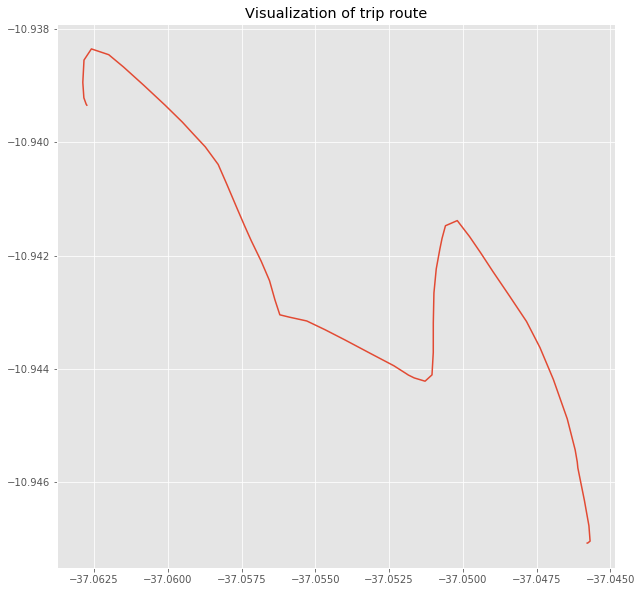

In [22]:
plt.figure(figsize=(10,10))
plt.title("Visualization of trip route")
plt.plot(df_trip["longitude"], df_trip["latitude"])
plt.show()

### 2.2 Find out distance between start and end point of the trip

finding out meters from degrees : https://sciencing.com/convert-distances-degrees-meters-7858322.html

In [24]:
len(df_trip)

90

In [27]:
start = df_trip[["latitude","longitude"]].iloc[0]
end = df_trip[["latitude","longitude"]].iloc[89]
print(start)
print(end)

latitude    -10.939341
longitude   -37.062742
Name: 0, dtype: float64
latitude    -10.947085
longitude   -37.045783
Name: 89, dtype: float64


In [51]:
# Step 1: Find out degrees of separation of latitudes and longitudes
DOF_lat = start["latitude"] - end["latitude"]
DOF_long = start["longitude"] - end["longitude"]

# Step 2: Convert degrees of separation to distances (meters)
dist_lat = DOF_lat * 111139
dist_long = DOF_long * 111139

# Step 3: Use pythagoras theorem to find the distance
final = np.sqrt((dist_lat*dist_lat) + (dist_long*dist_long))

In [52]:
print("The distance between start and end point of the trip is : ", final, "meters")

The distance between start and end point of the trip is :  2072.03340276235 meters


### 2.3 Find out total distance covered in the trip

We have data points at the interval of 5 seconds. So we will have to find out the distances between every 2 points and then add them.
To simplify things we will define a function which converts latitude and longitude to meters as we did in the above steps.

In [53]:
def find_distance(start_lat, start_long, end_lat, end_long):
    
    DOF_lat = start_lat - end_lat
    DOF_long = start_long - end_long
    
    dist_lat = DOF_lat * 111139
    dist_long = DOF_long * 111139
    
    dist = np.sqrt((dist_lat*dist_lat) + (dist_long*dist_long))
    
    return dist
    

In [54]:
# Lets verify the function works properly
find_distance(-10.939341,-37.062742,-10.947085,-37.045783)

2072.011376406596